In [163]:
# Read test files
from pyuvdata import UVData
from hera_commissioning_tools import plots, utils
import glob
import os
import numpy as np

uv_sum_autos = UVData()
uv_sum = UVData()
uv_diff_autos = UVData()
uv_diff = UVData()

root_dir = os.path.dirname(os.path.abspath("../setup.py"))

HHfiles, difffiles, HHautos, diffautos = utils.get_files(f'{root_dir}/hera_commissioning_tools/tests',2459710)
uv_sum_autos.read(HHautos)
uv_sum.read(HHfiles)
uv_diff_autos.read(diffautos)
uv_diff.read(difffiles)

HHfiles, difffiles, HHautos, diffautos = utils.get_files(f'{root_dir}/hera_commissioning_tools/tests',2459122)
uv_sum_sky = UVData()
uv_diff_sky = UVData()
uv_sum_sky.read(HHfiles)
uv_diff_sky.read(difffiles)

LST values stored in /Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/tests/2459710.sum.autos.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.
LST values stored in /Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/tests/2459710.diff.autos.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.


## plot_autos

Plot spectra for a single time (default is the middle index of the time array), organized by node, and within that by SNAP and SNAP input. Heading colors and abbreviations indicate antenna apriori status.

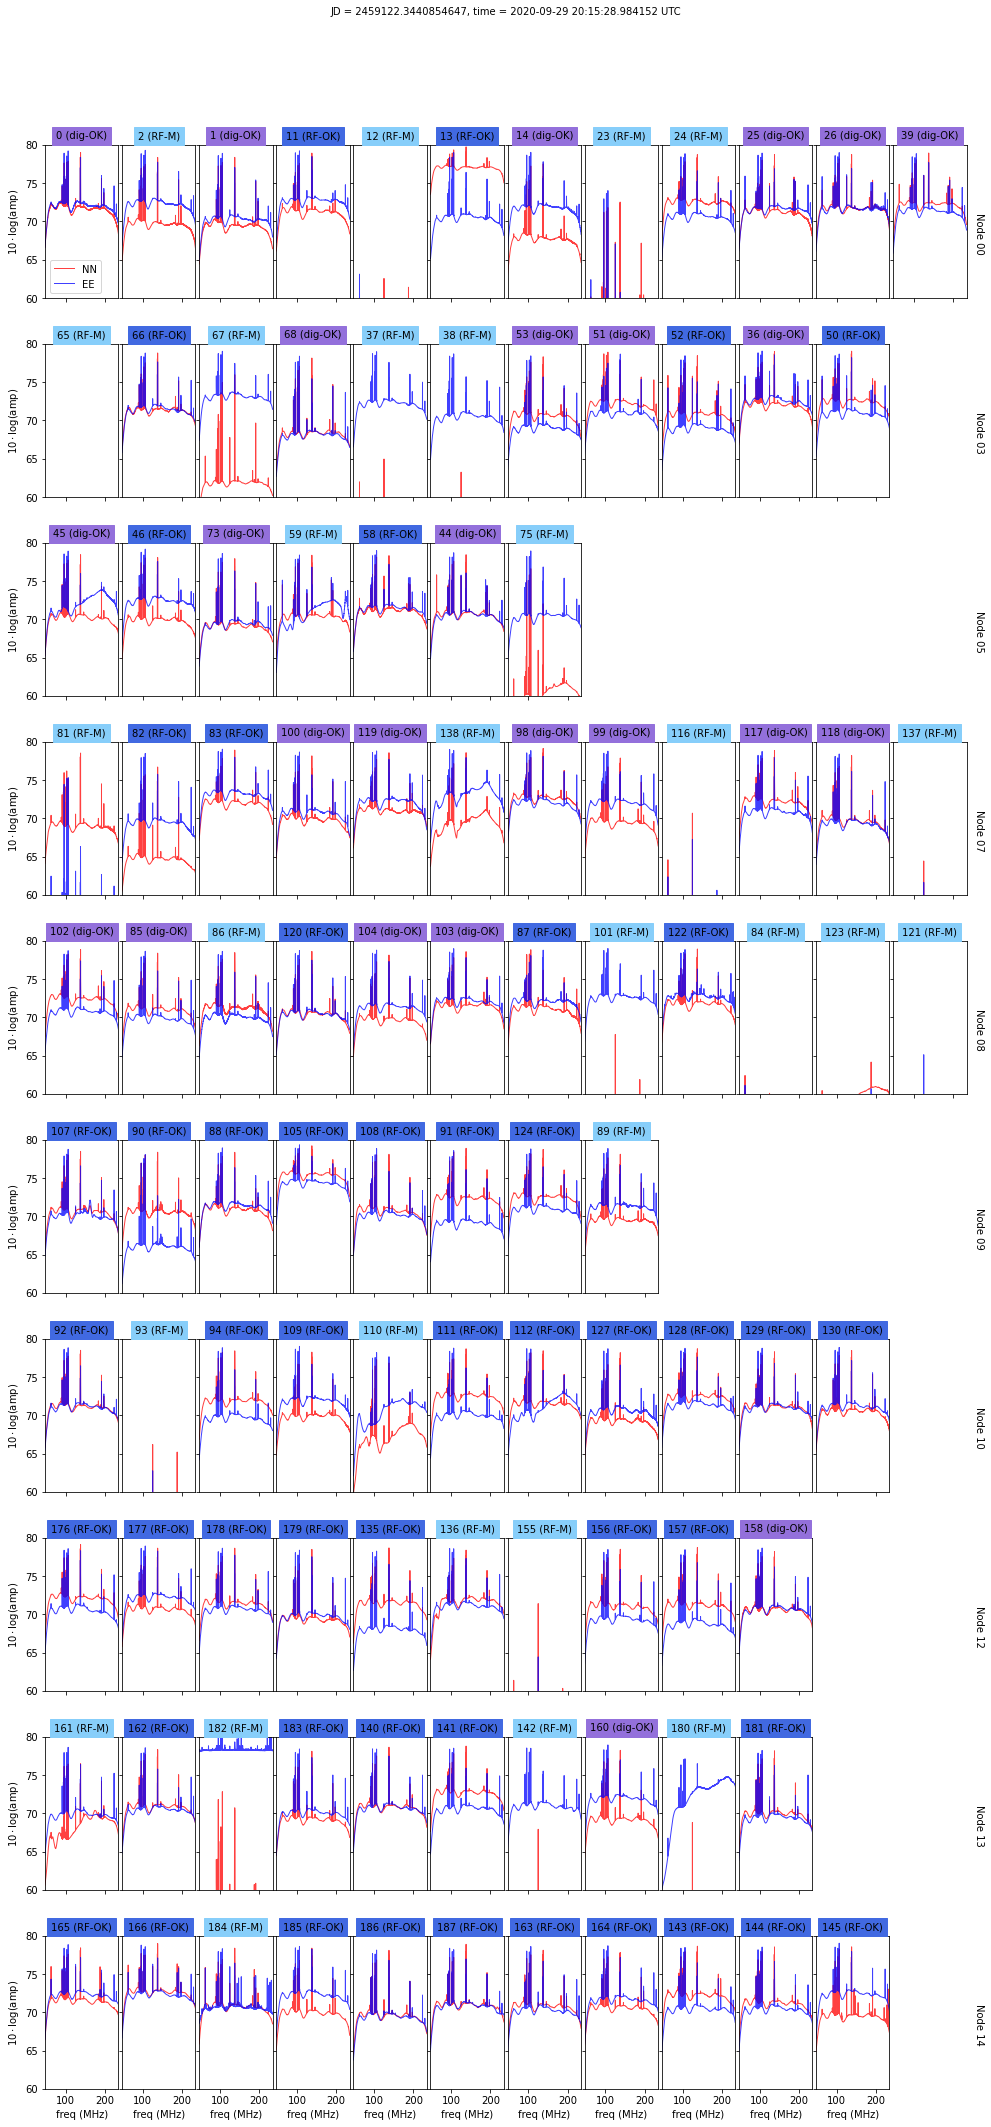

In [191]:
plots.plot_autos(uv_sum_sky,dtype='sky')

## plot_wfs

Plot waterfalls of time versus frequency for all given antennas, organized by node, and within that by SNAP and SNAP input. Heading colors and abbreviations indicate antenna apriori status.

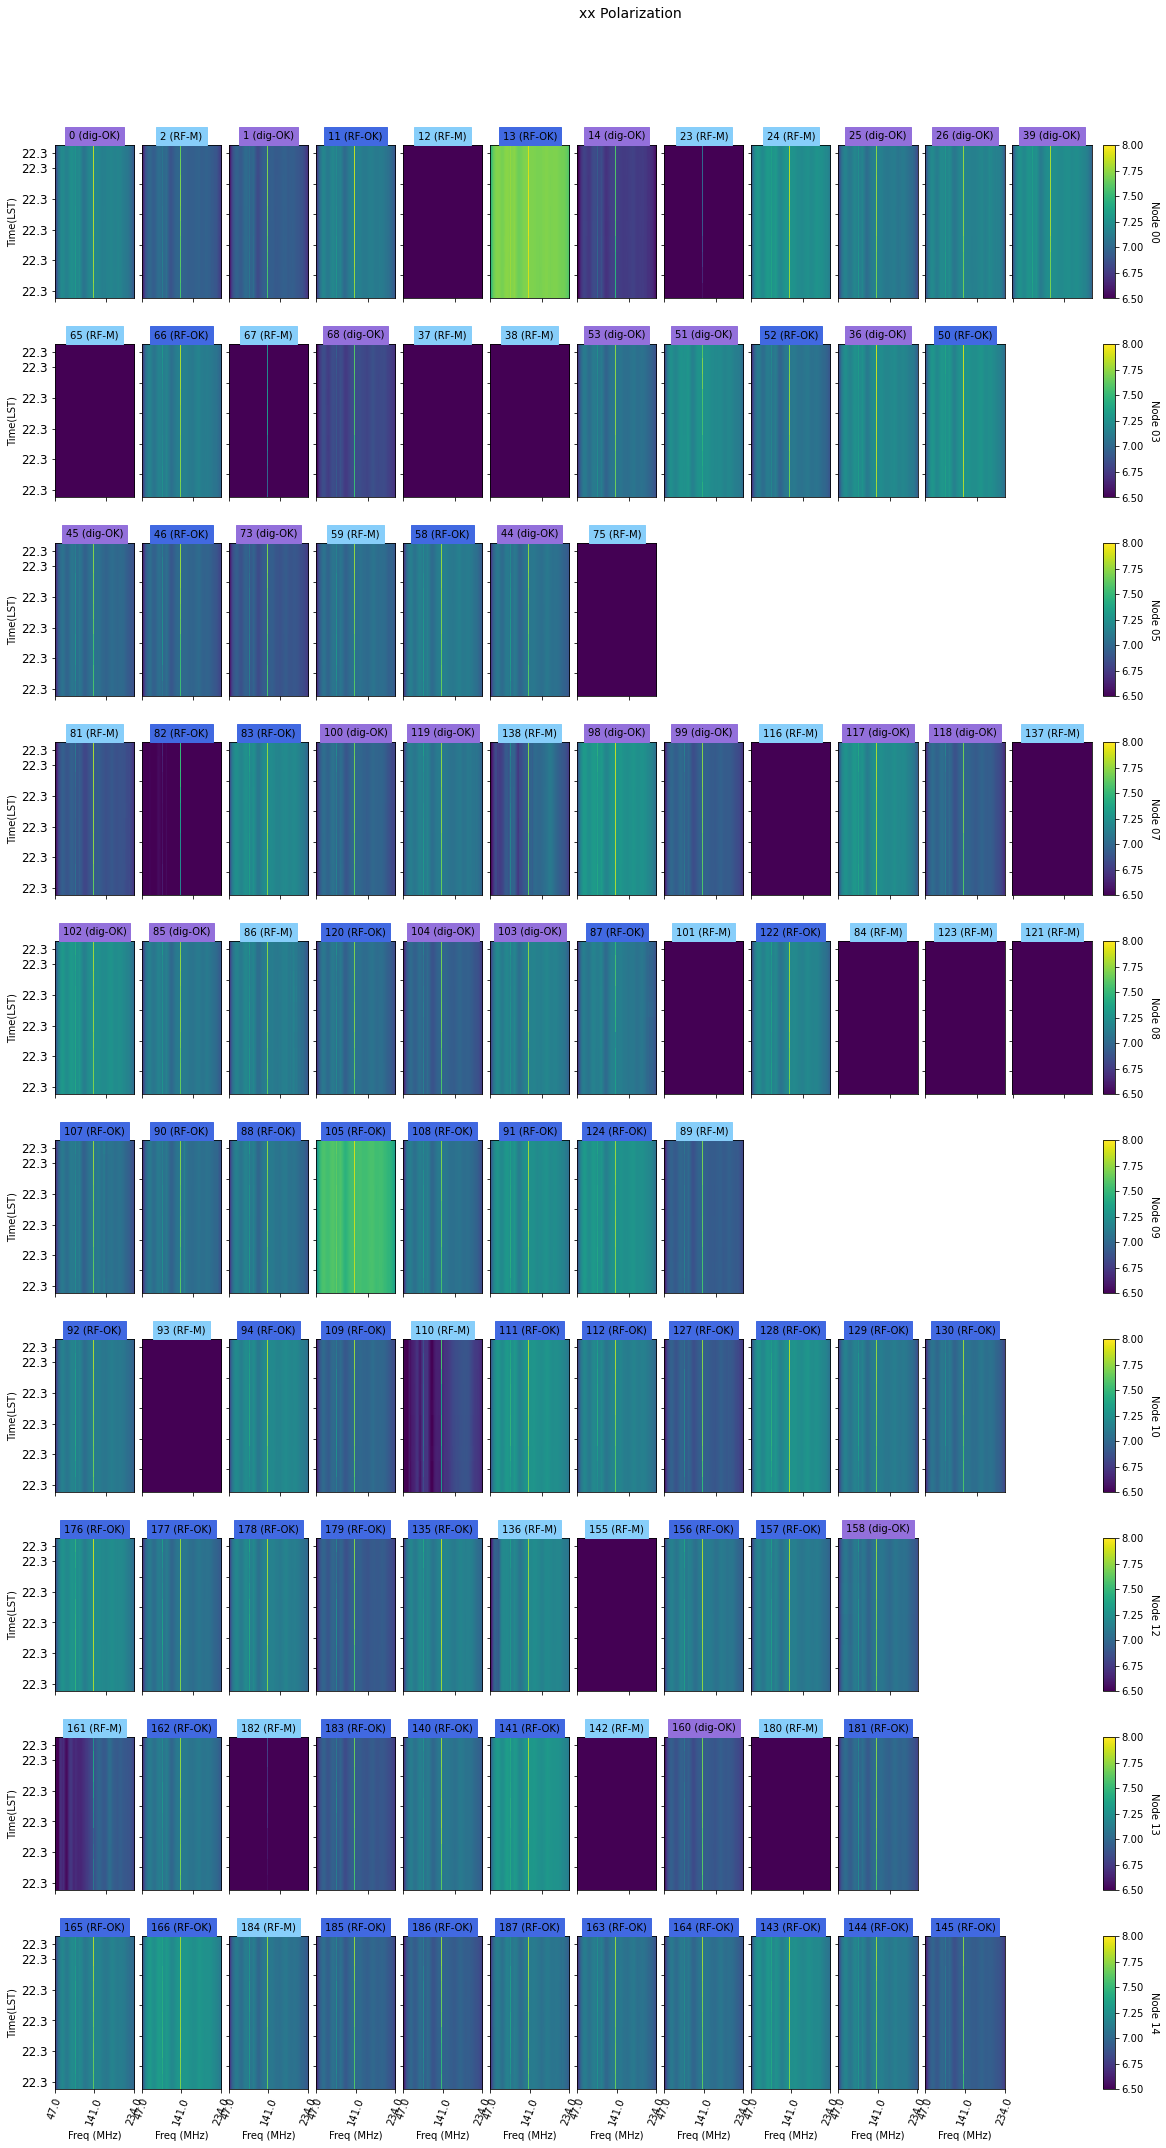

In [190]:
plots.plot_wfs(uv_sum_sky,pol='xx',dtype="sky")

## auto_waterfall_lineplot

Plot a detailed view of an individual antenna - this displays waterfalls of time versus frequency for both polarizations, along with spectra of an individual time slice and spectra of the average across all times.

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


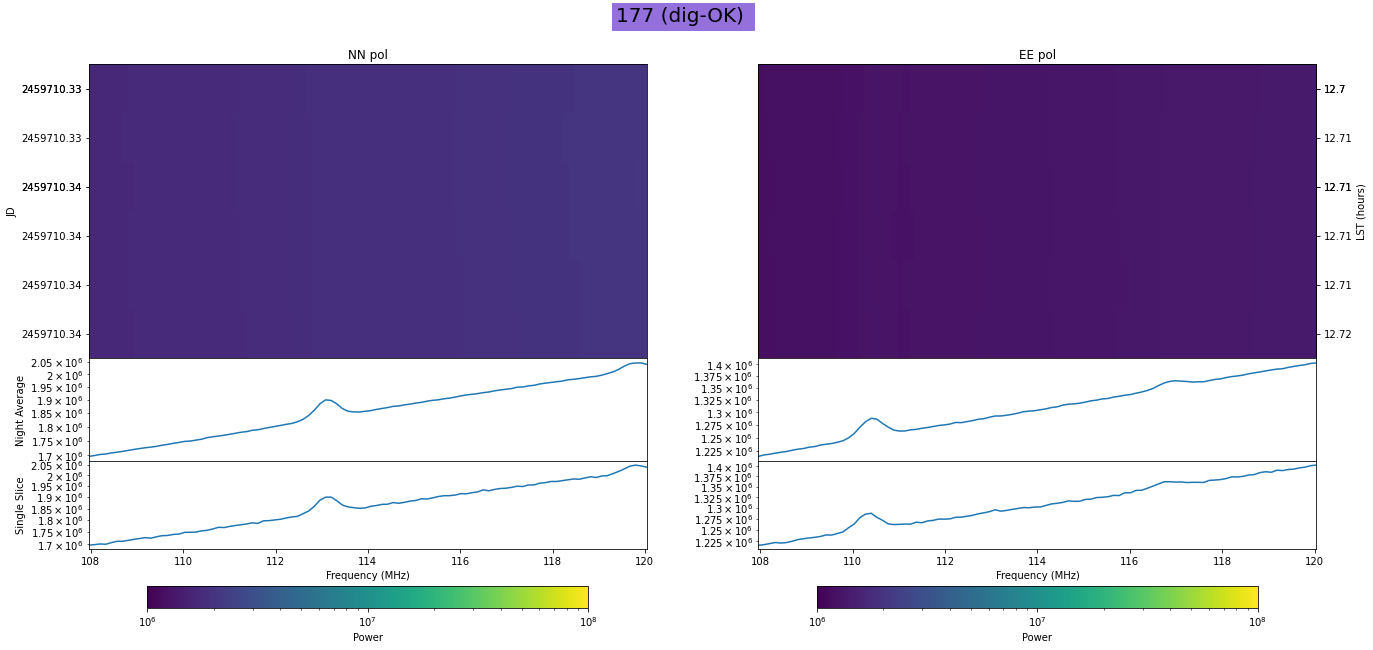

In [53]:
plots.auto_waterfall_lineplot(uv_sum_autos,177)

## plot_sky_map

Plot a map of the radio sky (made using the Haslam 408MHz map). The RA/DEC range covered by the provided observation is shaded based on a 12 degree FWHM of the HERA beam. Horizontal dashed lines represent the stripe that HERA can observe, while the shaded region is what was observed on this night. Vertical lines represent the beginning and ending LSTs of this observation. Selected sources are labelled, sources included are those in the GLEAM 4Jy catalog with a flux >10.9 Jy. Note that the map is clipped at the northern horizon.

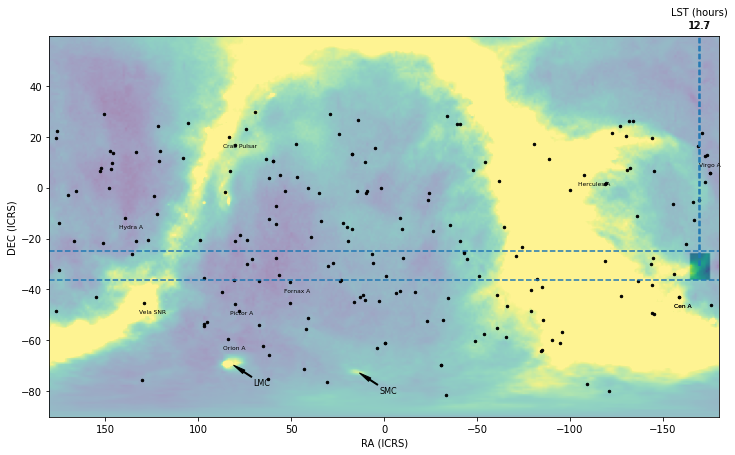

In [100]:
catalog_path=f'{root_dir}/hera_commissioning_tools/files/G4Jy_catalog.tsv'
map_path=f'{root_dir}/hera_commissioning_tools/files/haslam408_dsds_Remazeilles2014.fits'
sources = utils.gather_source_list(catalog_path)
plots.plot_sky_map(uv_sum_autos,map_path,dec_pad=55,ra_pad=55,clip=False,sources=sources)

## plotVisibilitySpectra

Visibility amplitude spectra for a set of redundant baselines, labeled by inter vs. intranode baselines. The red and blue should exhibit the same bandpass shape - if the red are consistently different from the blue, this indicates an issue with internode correlations.

<Figure size 432x288 with 0 Axes>

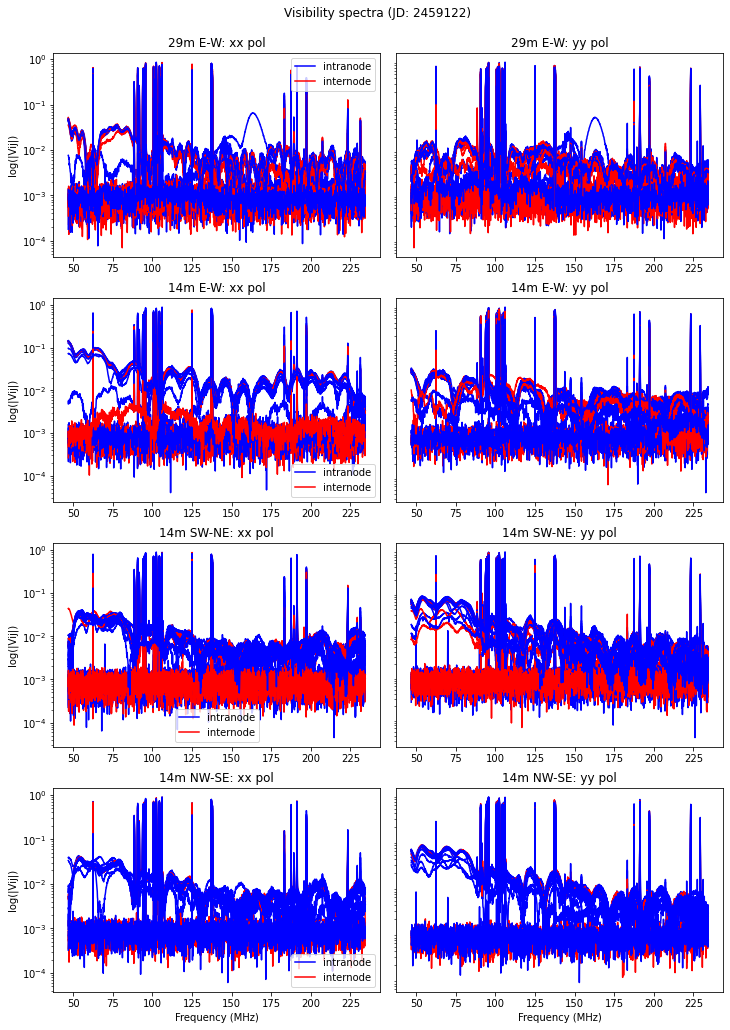

In [112]:
uv_sum_sky = UVData()
uv_sum_sky.read(f'{root_dir}/hera_commissioning_tools/tests/zen.2459122.34504.sum.uvh5')
plots.plotVisibilitySpectra(uv_sum_sky, use_ants='all', badAnts=[])

## plot_antenna_positions

Map of antenna positions. Antennas listed in the badAnts parameter are outlined in black. Gold stars are node box locations. Faded antennas have positional information but do not have data associated with them.

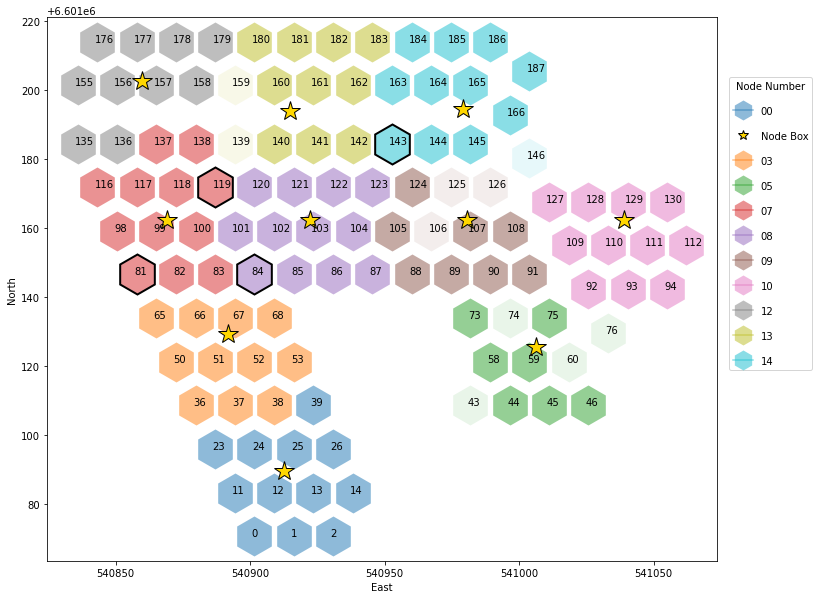

In [117]:
plots.plot_antenna_positions(uv_sum_sky,badAnts=[81,84,119,143])

## plot_lst_coverage

Plot the LST and JD coverage of a given data set.

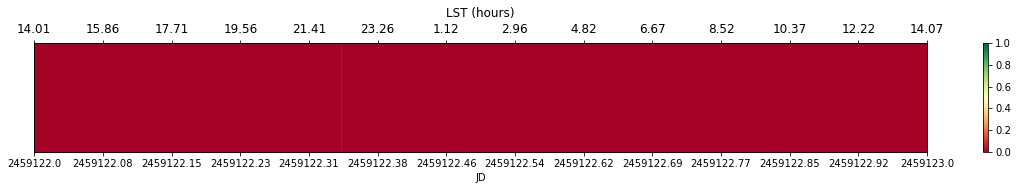

In [145]:
plots.plot_lst_coverage(uv_sum_sky)

## plotEvenOddWaterfalls

A waterfall showing the ratio between the even and odd visibilities. The purpose of this is to highlight xengine failures, which will cause this value to fall to zero or go to infinity. If things are working properly, this value should be stable at 1. The boundaries between different x-engines are shown by the vertical white lines.

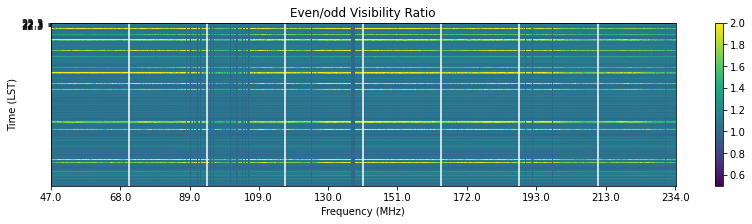

In [192]:
plots.plotEvenOddWaterfalls(uv_sum_sky,uv_diff_sky)

## plotCrossWaterfallsByCorrValue

TypeError: 'NoneType' object is not subscriptable

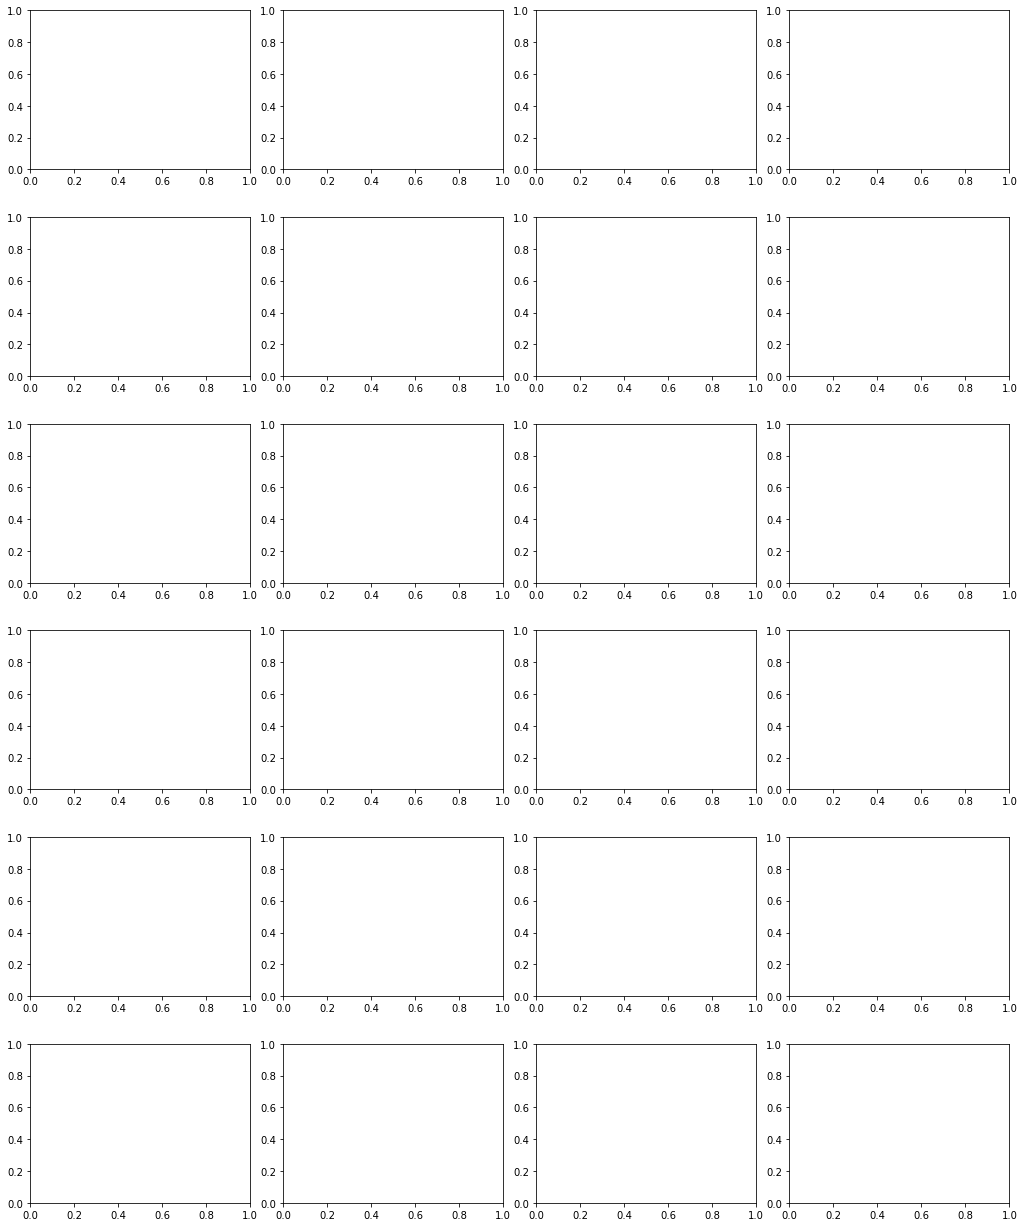

In [148]:
plots.plotCrossWaterfallsByCorrValue(uv_sum_sky)

## plotTimeDifferencedSumWaterfalls

Waterfalls of baseline number versus frequency (such that each row is an individual baseline). Each panel takes the visibility difference between a pair of adjacent times, as indicated by the panel titles.

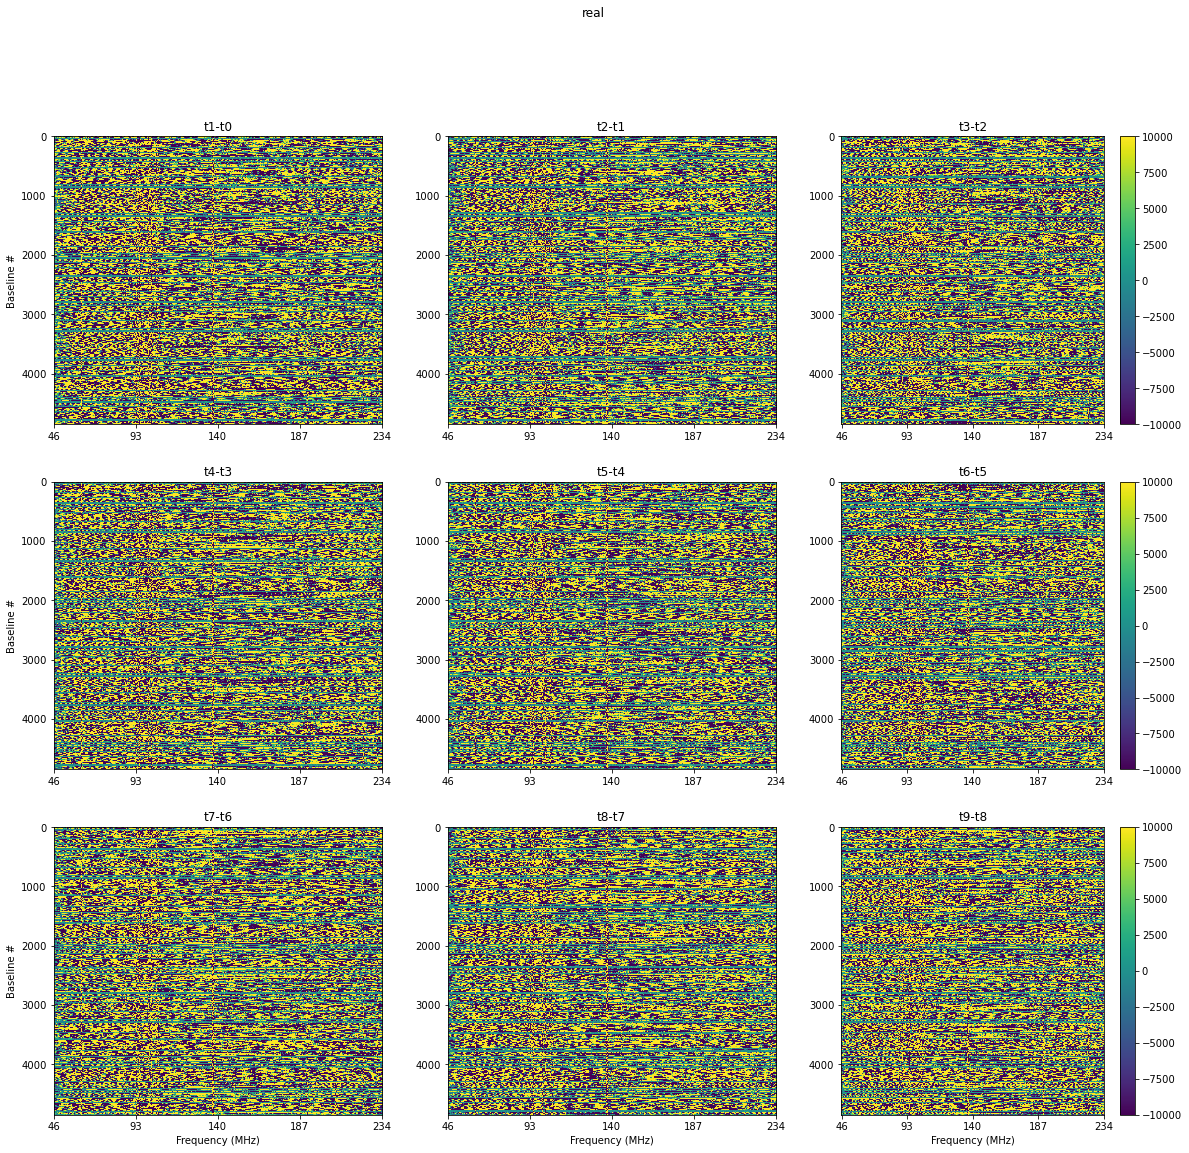

In [151]:
uvd, sdiffs = plots.plotTimeDifferencedSumWaterfalls(uvd=uv_sum_sky)

## calc_corr_metric

In [217]:
import importlib
importlib.reload(utils)
importlib.reload(plots)

<module 'hera_commissioning_tools.plots' from '/Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/plots.py'>

In [265]:
importlib.reload(utils)
corr, perBlSummary = utils.calc_corr_metric(uv_sum_sky,uv_diff_sky,pols=['EE'])

invalid value encountered in true_divide
invalid value encountered in true_divide


In [266]:
np.shape(corr)

(104, 104)

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


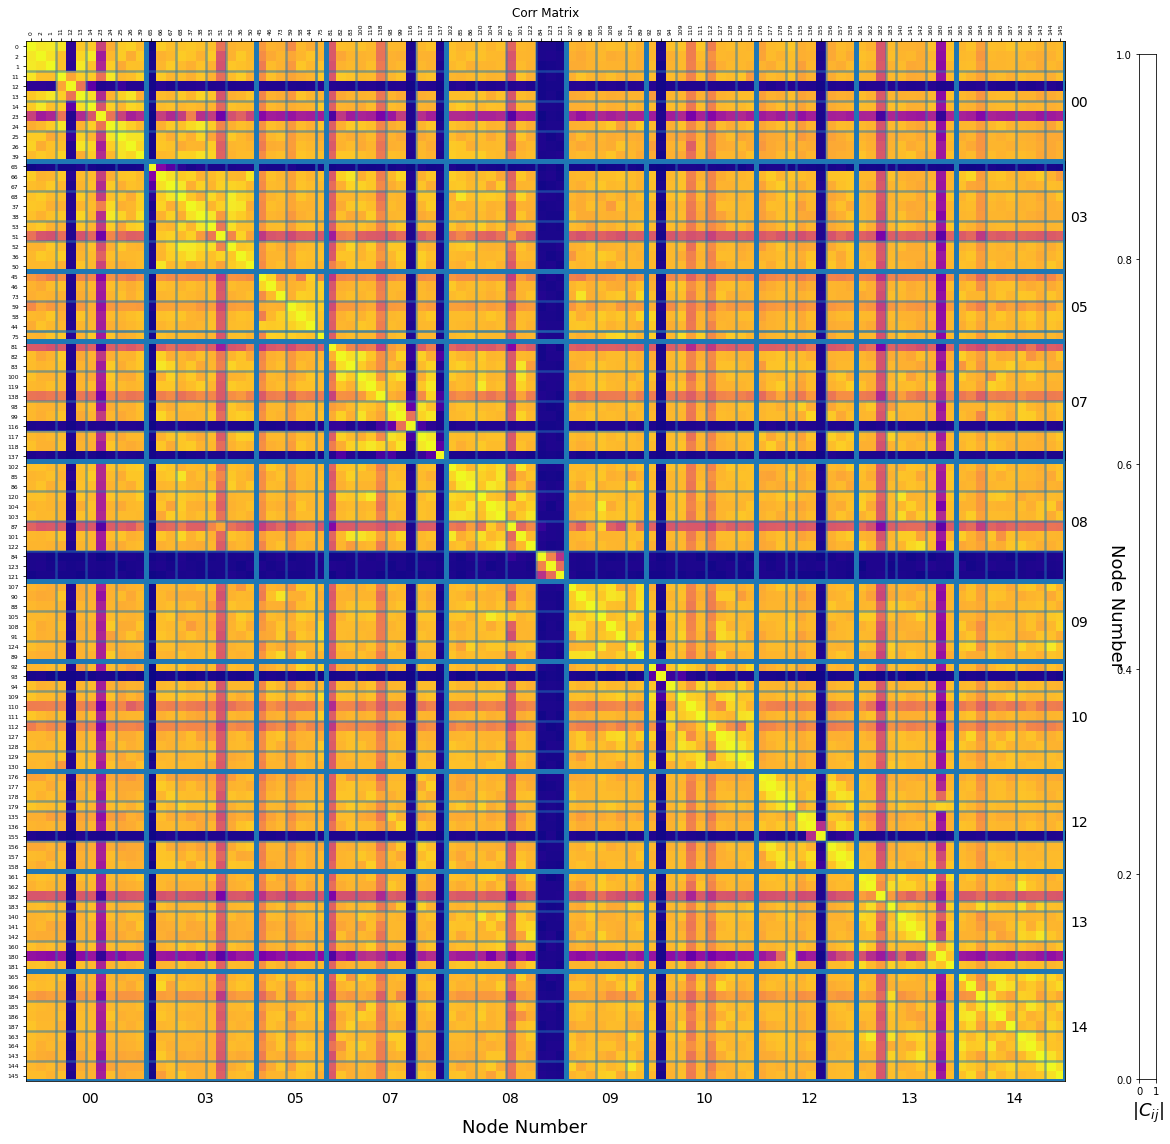

In [267]:
importlib.reload(plots)
plots.plot_single_matrix(uv_sum_sky,corr,pols=['E'])